# Getting Started with Python for Earth Sciences: Jupyter Notebooks and Numpy
## Eviatar Bach
PhD student, Department of Atmospheric and Oceanic Science, University of Maryland, College Park

[My website](http://eviatarbach.com/) | [My email](mailto:eviatarbach@protonmail.com) | [My Twitter](https://twitter.com/eviatarbach) | [My GitHub](https://github.com/eviatarbach/)

Notes prepared with Rebekah Esmaili and Kriti Bhargava

# About me

PhD student with interests in climate dynamics, predictability, and data assimilation. Not satellites! But almost all my work has involved Python in some way. Feel free to email me with questions!

# Introduction

---

## Why Python?

Pros

* General-purpose, cross-platform
* Free and open source
* Reasonably easy to learn
* Expressive and succinct code, forces good style
* Being interpreted and dynamically typed makes it great for data analysis
* Robust ecosystem of scientific libraries, including powerful statistical and visualization packages
* Large community of scientific users and large existing codebases
* Major investment into Python ecosystem by Earth science research agencies, including NASA, NCAR, UK Met Office, and Lamont-Doherty Earth Observatory. See [Pangeo](https://pangeo.io/collaborators.html).
* Reads Earth science data formats like HDF, NetCDF, GRIB

Cons

* Performance penalties for interpreted languages, although many libraries are wrappers for compiled languages. Avoid large loops in favor of matrix/vector operations when possible.
* Multithreading is limited due to the Global Interpreter Lock, but other parallelism is available
* See [Julia](https://julialang.org/) for a modern scientific language which is trying to overcome these challenges

---

## Objective: working with Earth science datasets

* You won't learn how to code in Python
* You will learn to:
	* Read/write ASCII data
	* Basic plotting and visualization
	* Perform data filtering
    
---

Python is an interpreted language, so you will need as a minimum to have Python on your computer.

## What is Anaconda?

* Conda is a package manager
* Anaconda comes with conda, as well as Python, a lot of useful scientific/mathematical packages, and development environments.
* Easiest place to start if you're new

## Development environments

* Spyder: most Matlab-like
* Jupyter notebooks: web based, runs code inline. Can also be run remotely over SSH; see [here](https://fizzylogic.nl/2017/11/06/edit-jupyter-notebooks-over-ssh/).
* Text editor + run with command line for scripting ([IPython interpreter](https://ipython.org/) highly recommended)

---
## Launching Jupyter Notebook

### Linux/Mac

* Open terminal, **cd to the directory where you have your notebooks and data**, and type:
```
jupyter notebook    
```

### Windows

* Start &rarr; Anaconda3 &rarr; Jupyter Notebook


## Jupyter Home Screen

* This will launch your default web browser with a local webserver that displays the contents of the directory that you're working in.

* Note: in all the examples, the path assumed that Jupyter is launched from the notebook directory. You will need to change the path to point to your data if this is different.

* Click on New on the top right.

![](figures/jn-screenshot.png)

<div class="alert alert-block alert-info">

<b> Exercise 1: Set up your environment and create a notebook </b>

* For your operating system, launch Jupyter Notebooks
* Create a new notebook
* Change the name from "untitled" to something better
* Save in the __same directory as the data folder__ that we provided (or move the data directory to the same place at the file because we'll need it later!).

</div>

## Basic Python commands


In [2]:
# This is how we comment and below is how we print
print("Hello, world!")

Hello, world!


In [3]:
# for loop
for i in range(5):
    print(i)

0
1
2
3
4


In [17]:
# iterating over list elements
print("List of hurricanes in 2019:")

# hurricanes is a list (in computer science terminology, a linked list)
hurricanes = ["Barry", "Dorian", "Humberto", "Jerry", "Lorenzo", "Pablo"]

for idx, name in enumerate(hurricanes): # notice the colon at the end
    print(idx + 1, name) # because index starts from zero in python

List of hurricanes in 2019:
1 Barry
2 Dorian
3 Humberto
4 Jerry
5 Lorenzo
6 Pablo


In [6]:
a = [1, 2, 3, 4, 5, 6]
b = a*2

In [7]:
# Is this what you expected to happen?
b

[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6]

* Python's default list structure is for any type, not designed specifically for numeric operations
* Need to use an additional package to do vector/matrix operations

## Importing packages
Packages give us additional functionality, saving us the trouble of writing procedures ourselves. There are ~6000 packages in the [conda-forge repository](https://anaconda.org/conda-forge/repo) alone!

We'll now import **NumPy**. NumPy provides high-performance multidimensional arrays and linear algebra operations (similar to Matlab). It is a fundamental package for scientific computing with Python.

In [9]:
# Importing NumPy
import numpy as np # np becomes the alias for numpy

In [10]:
# NumPy arrays
a = np.array(a) # a is now a NumPy array
b = a*2

print(b)

[ 2  4  6  8 10 12]


In [11]:
# Reshaping arrays
a_reshaped = a.reshape(3, 2)
print(a_reshaped)

[[1 2]
 [3 4]
 [5 6]]


In [37]:
# Indexing
print(a_reshaped[0, :])  # First row
print(a_reshaped[:, 0])  # First column
print(a_reshaped[2, 1])  # Third row, second column
print(a_reshaped[1:3, :])  # Second and third rows

[1 2]
[1 3 5]
6
[[3 4]
 [5 6]]


In [12]:
# Sum vertically downwards across rows (axis 0)
a_reshaped.sum(axis=0)

array([ 9, 12])

In [14]:
print(a_reshaped.sum(axis=1))  # sum across columns
print(a_reshaped.sum())  # sum entire array

[ 3  7 11]
21


In [15]:
# Get the minimum horizontally across columns (axis 1)
a_reshaped.max(axis=1)

array([2, 4, 6])

In [16]:
# Boolean operations
a_reshaped > 1

array([[False,  True],
       [ True,  True],
       [ True,  True]])

In [22]:
# Has many capabilities; for example, the code below creates a random linear system and solves it

# Standard Gaussian distributed 10-by-10 matrix (A) and 10-element vector (b)
A = np.random.randn(10, 10)
b = np.random.randn(10)

# Solve A*x == b
x = np.linalg.solve(A, b)

print(x)

[ 1.3154697   0.02241344  0.97221131  0.57315349 -1.30022562 -0.02177485
  0.00327059 -2.22128829  0.28494407  0.19229305]


In [27]:
# Verify that x is an (approximate) solution. Note @ operator for matrix multiplication; np.dot works too.
A@x - b

array([-2.22044605e-16,  6.66133815e-16, -1.11022302e-16, -5.55111512e-16,
       -9.15933995e-16,  0.00000000e+00, -1.27675648e-15, -3.33066907e-16,
        5.75928194e-16, -8.88178420e-16])

For more examples, work through the [NumPy quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

### Pandas
* A library to work with tabular data
* Comparable to data frames in R

Pros:

* You can name columns and refence by labels instead of numeric indices like in NumPy arrays
* This also makes performing group operations easier and more readable

Cons:

* Designed for tabular data, not for dimensions > 2. We will cover xarray for N-dimensional data later.

---

### Looking at real in-situ data: AERONET
* Aerosols are particles suspended in the atmosphere, including dust, sea salt, volcanic ash, smoke, and pollution.
* Aerosol Optical Depth (AOD) is a unitless measure of the amount of aerosols in the atmosphere.
* AERONET (AErosol RObotic NETwork) stations provide in-situ AOD observations.

In [38]:
import pandas as pd

In [39]:
filename = 'data/aeronet_locations_v3.txt'
station_list = pd.read_csv(filename, skiprows=1)

**Note: If you are getting errors!** 

Check the path in the home tab in your browser, it must be relative to the where Jupyter was initially launched.

In [42]:
# Show column names - kind of ugly
station_list.columns

Index(['Site_Name', 'Longitude(decimal_degrees)', 'Latitude(decimal_degrees)',
       'Elevation(meters)'],
      dtype='object')

In [43]:
# Shorter column names
station_list.columns = ['site', 'lon', 'lat', 'elev']

# List the first few rows
station_list[0:5]

,site,lon,lat,elev
0,Cuiaba,-56.070214,-15.555244,234.0
1,Alta_Floresta,-56.104453,-9.871339,277.0
2,Jamari,-63.068552,-9.199070,129.0
3,Tucson,-110.953003,32.233002,779.0
4,GSFC,-76.839833,38.992500,87.0


<div class="alert alert-block alert-info">

<b>Exercise 2: Import an ASCII file </b>

* From the data folder, import "20180801_20180831_PNNL_lev15.csv" using the pandas read_csv command. Assign it to a variable.
    * HINT: You might need to check out the file path with respect to your notebook location.
* What are the column names?
</div>

### Basic Plotting with Matplotlib

Common (simple) tasks in Earth science...

* Histograms
* Time series
* Taking averages, computing the bias

In [49]:
# Matplotlib
from matplotlib import pyplot as plt

# Options to increase figure size
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 16})

Text(0.5, 0, 'Latitude')

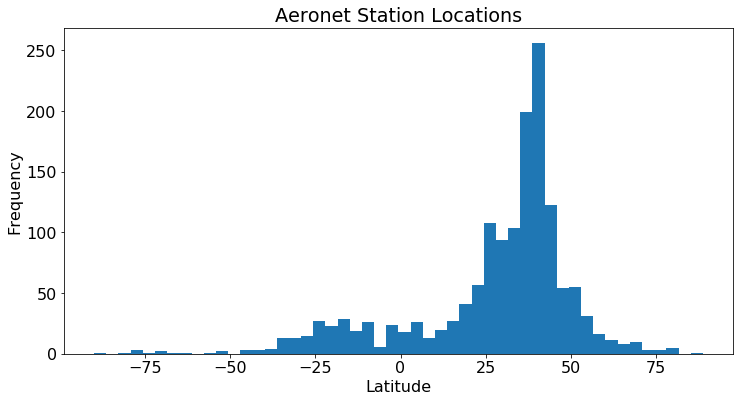

In [51]:
# Create a histogram with 50 bins
plt.hist(station_list["lat"], bins=50)
plt.title("Aeronet Station Locations")
plt.ylabel("Frequency")
plt.xlabel("Latitude")

#### Time series data

Need to tell Python the date strings in the file are dates/times.

In [53]:
ground_station_PNNL = pd.read_csv('data/20180801_20180831_PNNL_lev15.csv')

In [54]:
# Examine the first few lines...
ground_station_PNNL[0:2]

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4
0,01:08:2018,13:38:54,213,213.568681,0.021377,0.045989,0.059832,-999.0,-999.0,0.091885,...,0.3796,0.3406,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,01:08:2018,13:43:01,213,213.571539,0.019886,0.041031,0.053130,-999.0,-999.0,0.080608,...,0.3796,0.3406,0.936,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [55]:
# Convert the string dates and times to date format (note the line continuation)
ground_station_PNNL['datetime'] = (ground_station_PNNL['Date(dd:mm:yyyy)'] + ' '
                                   + ground_station_PNNL['Time(hh:mm:ss)'])

# Explicitly declare the format (for the full list, see http://strftime.org)
fmt = '%d:%m:%Y %H:%M:%S'
ground_station_PNNL['datetime'] = pd.to_datetime(ground_station_PNNL['datetime'], format=fmt)

#### Plotting a single variable

* Add the data using plt.plot(dataframe['X Column Name'], dataframe['Y Column Name'])

Text(0.5, 1.0, '870nm')

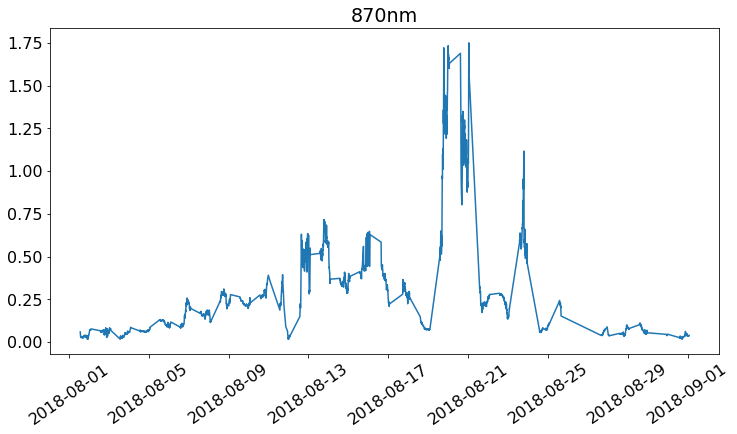

In [56]:
plt.plot(ground_station_PNNL['datetime'], ground_station_PNNL['AOD_870nm'])
plt.xticks(rotation=35)
plt.title('870nm')

<div class="alert alert-block alert-info">

**Exercise 3**


??? = Fill in the blank!


**Create a histogram**

* Import the aeronet station list and locations from the file aeronet_locations_v3.txt using the pandas read_csv command.
* Plot a histogram of the longitude distribution of stations using the ???.hist(???) command

**Challenge: Create a time series plot**

* Import time series data from 20180801_20180831_PNNL_lev15.csv.
* Create a new column in the dataframe with a string that combines the dates and times
* Convert the string of dates and times to datetime format using the pandas to_datetime command. 
    * Note: Explicitly specify the format of the dates and times in the string for pandas to parse.
* Use the ???.plot(???, ???) to create a plot.
</div>

#### Plotting two side-by-side plots

* Before writing your plt.plot code, add:
plt.subplot(__row number__, __column number__, __position of the plot__)

* Call plt.plot() and fill in the x and y variables for the first line/data series on the plot
* Call plt.subplot again, increment the position of plot number
* Add in any aesthetics, such as rotating the axes, labels, and adding a legend
* Show the plot using plt.show()

Example: 
* plt.subplot(2, 1, 1) places the plot in the first position of a two row, one column stack of plots.
* plt.subplot(1, 2, 2) places the plot in the second position of a two column, one row of plots next to each other.

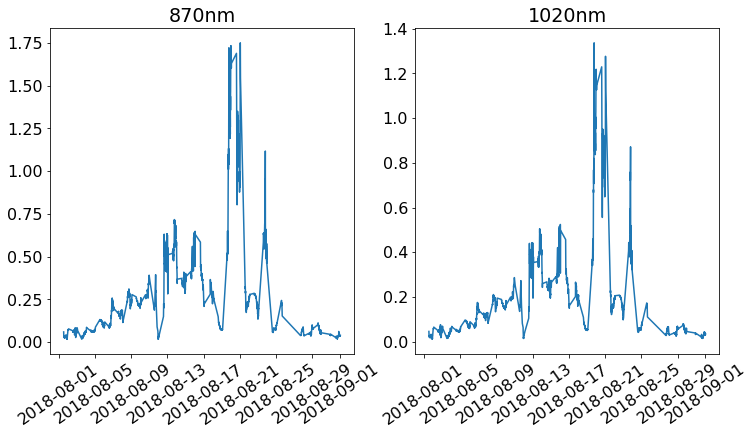

In [57]:
# Call the subplot - in column one, write the AOD_870nm plot
plt.subplot(1, 2, 1)

plt.plot(ground_station_PNNL['datetime'], ground_station_PNNL['AOD_870nm'])
plt.xticks(rotation=35)
plt.title('870nm')

# Call the subplot - in column one, write the AOD_1020nm plot
plt.subplot(1, 2, 2)
plt.plot(ground_station_PNNL['datetime'], ground_station_PNNL['AOD_1020nm'])
plt.xticks(rotation=35)
plt.title('1020nm')

plt.show()

#### Adding data to an existing plot

* Call plt.plot() and fill in the x and y variables for EACH line/data series on the plot
* Add in any aesthetics, such as rotating the axes, labels, and adding a legend
* Show the plot using plt.show()

Note: If you want to change from a line to a point, you can add a '.' argument to plot.plot() or use plt.scatter() instead.

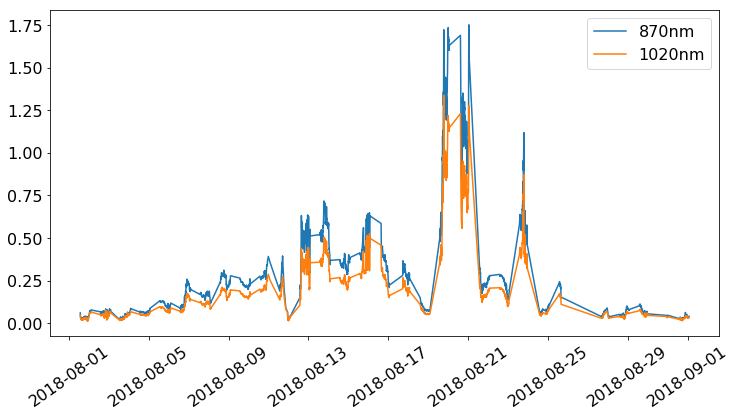

In [58]:
plt.plot(ground_station_PNNL['datetime'], ground_station_PNNL['AOD_870nm'])
plt.plot(ground_station_PNNL['datetime'], ground_station_PNNL['AOD_1020nm'])
plt.xticks(rotation=35)
plt.legend(['870nm', '1020nm'])
plt.show()

#### Filtering Data
Sometimes there are values we don't want in our plots, e.g. missing data values of -999.0

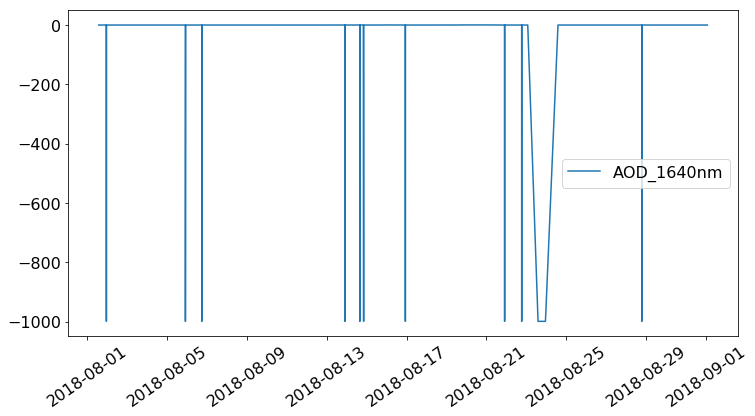

In [59]:
# The following plot is not very useful because the missing values are being added
plt.plot(ground_station_PNNL['datetime'], ground_station_PNNL['AOD_1640nm'])
plt.xticks(rotation=35)
plt.legend()
plt.show()

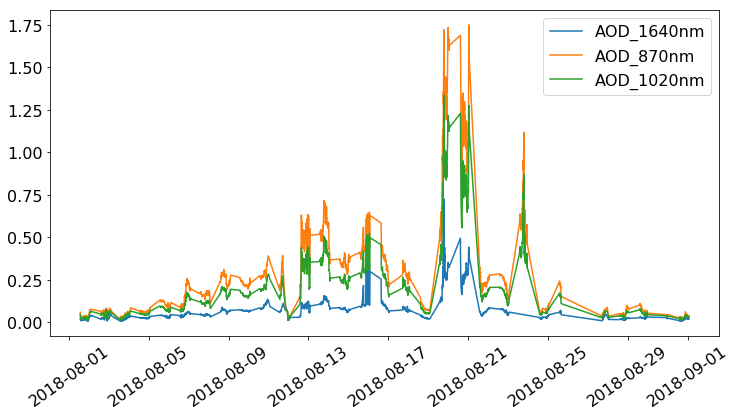

In [60]:
# Filter out missing values by only using ground_station_PNNL['AOD_1640nm'] >= 0
valid_mask = ground_station_PNNL['AOD_1640nm'] >= 0

# Then plot the filtered values...
plt.plot(ground_station_PNNL[valid_mask]['datetime'], ground_station_PNNL[valid_mask]['AOD_1640nm'])

#Option: Add in the other AOD lines
plt.plot(ground_station_PNNL['datetime'], ground_station_PNNL['AOD_870nm'])
plt.plot(ground_station_PNNL['datetime'], ground_station_PNNL['AOD_1020nm'])

plt.legend()
plt.xticks(rotation=35)

plt.show()

### Saving images

* You can right click and save
* Add plt.savefig('pick_a_filename')

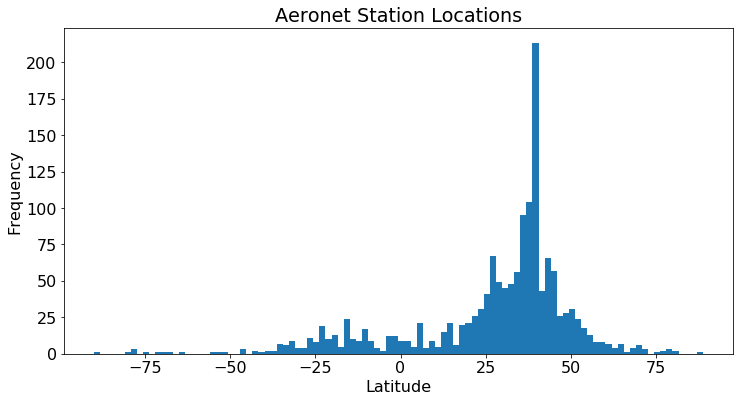

In [61]:
plt.hist(station_list["lat"], bins=100)
plt.title("Aeronet Station Locations")
plt.ylabel("Frequency")
plt.xlabel("Latitude")

# Save as vector format, such as PDF, SVG, or EPS, when possible
plt.savefig("histogram.pdf")

## Resources

* Some (free!) ways to learn: 
    * [CS Dojo](https://www.youtube.com/watch?v=Z1Yd7upQsXY&list=PLBZBJbE_rGRWeh5mIBhD-hhDwSEDxogDg) Youtube series for absolute beginners
    * [Automate boring stuff](https://automatetheboringstuff.com)
    * [Codeacademy](https://www.codecademy.com/learn/learn-python)
    * [Local Meetups](https://www.meetup.com/find/tech/)
    * Start a Python Club!